<a href="https://colab.research.google.com/github/antonioacunab/challenge-telecom-x/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Challenge Telecom X**

Telecom X - Análisis de Evasión de Clientes

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?

✅ Importar y manipular datos desde una API de manera eficiente.
✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

##📌 Extracción

In [ ]:
import pandas as pd
import numpy as np
import requests

# Set options to display all columns
pd.set_option("display.max_columns", None)

data = requests.get("https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")

# data.json()

##🔧 Transformación

### Diccionario de datos
- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente


Las acciones más comunes a realizar son:
- Duplicados
- Valores vacíos
- Valores nulos
- Tipos de datos
- Valores atípicos
- Consistencia y validez de datos categóricos
- Normalización de textos

In [ ]:
df = pd.json_normalize(data.json())

df

# Otra manera de hacerlo
# ------------------------------------------------------------------------------

# normalized_customer_df = pd.json_normalize(raw_df["customer"])
# normalized_phone_df    = pd.json_normalize(raw_df["phone"])
# normalized_internet_df = pd.json_normalize(raw_df["internet"])
# normalized_account_df  = pd.json_normalize(raw_df["account"])

# df = pd.concat([raw_df["customerID"],
#                 raw_df["Churn"],
#                 normalized_customer_df,
#                 normalized_phone_df,
#                 normalized_internet_df,
#                 normalized_account_df
#                 ], axis = 1)

# df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
df.shape

(7267, 21)

In [ ]:
# Check duplicated lines
duplicated = df.duplicated().sum()

print(f"Number of duplicated lines: {duplicated}")

Number of duplicated lines: 0


In [ ]:
# Check for null values

for column in df.columns:
  print(f"{column}: {df[column].isnull().sum()}")

# Check null values
# null_values = df.isnull().values.sum()

# print("Null values per column:")
# print(null_values[null_values > 0])

customerID: 0
Churn: 0
customer.gender: 0
customer.SeniorCitizen: 0
customer.Partner: 0
customer.Dependents: 0
customer.tenure: 0
phone.PhoneService: 0
phone.MultipleLines: 0
internet.InternetService: 0
internet.OnlineSecurity: 0
internet.OnlineBackup: 0
internet.DeviceProtection: 0
internet.TechSupport: 0
internet.StreamingTV: 0
internet.StreamingMovies: 0
account.Contract: 0
account.PaperlessBilling: 0
account.PaymentMethod: 0
account.Charges.Monthly: 0
account.Charges.Total: 0


In [ ]:
# Since no null values were found, we check the values for each column to see if there are some out of the standards

for column in df.columns:
  print(f"{column}: {pd.unique(df[column])}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.SeniorCitizen: [0 1]
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contrac

In [ ]:
# From the last step, we can see that there are some empty values, let's get them
empty_values = df.apply(lambda x: x.astype(str).str.strip() == "").sum()

empty_values

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
# Delete columns where "Churn" is empty
df = df[df["Churn"].str.strip() != ""]

df.shape

(7043, 21)

In [ ]:
# Verify that there are no more empty values
empty_values = df.apply(lambda x: x.astype(str).str.strip() == "").sum()

empty_values

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
# Used to avoid a warning about saving in a copy
df = df.copy()

# Creating the column "Cuentas_Diarias"
df.loc[:, "account.Charges.Daily"] = df["account.Charges.Monthly"] / 30

df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [ ]:
for column in df.columns:
  print(f"{column}: {pd.unique(df[column])}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
customer.gender: ['Female' 'Male']
customer.SeniorCitizen: [0 1]
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: 

In [ ]:
list(df.columns)

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'account.Charges.Daily']

In [ ]:
# Renaming columns
df.rename(columns = {
    "customer.gender": "Gender",
    "customer.SeniorCitizen": "SeniorCitizen",
    "customer.Partner": "HasPartner",
    "customer.Dependents": "HasDependents",
    "customer.tenure": "Tenure",
    "phone.PhoneService": "PhoneService",
    "phone.MultipleLines": "MultipleLines",
    "internet.InternetService": "InternetService",
    "internet.OnlineSecurity": "OnlineSecurity",
    "internet.OnlineBackup": "OnlineBackup",
    "internet.DeviceProtection": "DeviceProtection",
    "internet.TechSupport": "TechSupport",
    "internet.StreamingTV": "StreamingTV",
    "internet.StreamingMovies": "StreamingMovies",
    "account.Contract": "Contract",
    "account.PaperlessBilling": "PaperlessBilling",
    "account.PaymentMethod": "PaymentMethod",
    "account.Charges.Monthly": "MonthlyCharges",
    "account.Charges.Total": "TotalCharges",
    "account.Charges.Daily": "DailyCharges"
}, inplace = True)

df

,customerID,Churn,Gender,SeniorCitizen,HasPartner,HasDependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DailyCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [ ]:
bool_cols = ["Churn", "HasPartner", "HasDependents", "PhoneService", "PaperlessBilling"]

# for col in bool_cols:
#   df[col] = df[col].map({"Yes": 1, "No": 0})

df

,customerID,Churn,Gender,SeniorCitizen,HasPartner,HasDependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DailyCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [ ]:
# Convert "yes"/"no" columns to numeric cols, to represent values as 0 and 1
# for col in bool_cols:
#   df[col] = pd.to_numeric(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   Gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   HasPartner        7043 non-null   object 
 5   HasDependents     7043 non-null   object 
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

##📊 Carga y análisis

In [ ]:
# Make a descriptive analysis of the data
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,DailyCharges
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
# Create a df that stores the churn count
churnCount = df["Churn"].value_counts().reset_index()

# Rename columns
churnCount.columns = ["Churn", "Count"]

# Create pie chart
fig = px.pie(churnCount, names="Churn", values="Count", color="Churn", title="Number of people who have churned from the services")

# Updated fig size and title alignment
fig.update_layout(width=600, height=500, title_x=0.5)

# Use a graphic to show the ratio of customers who churned vs who didn't
fig.show()

In [ ]:
fig = px.histogram(df, x="Gender", color="Churn", barmode="group", title="Cantidad de personas que evaden según género")

fig.show()

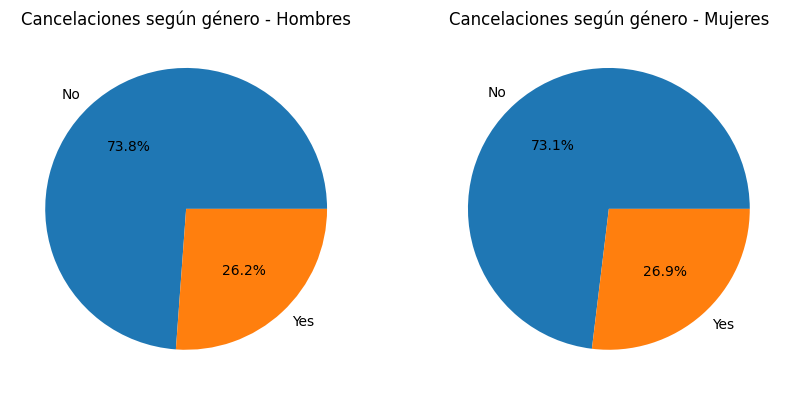

In [ ]:
# Create a df that stores the churn count

churn_count = df.groupby("Gender")["Churn"].value_counts().reset_index()

churn_men   = churn_count.copy()[(churn_count["Gender"] == "Male")]
churn_women = churn_count.copy()[(churn_count["Gender"] == "Female")]

churn_men.drop(columns=["Gender"], inplace=True)
churn_men.columns = ["Churn", "Count"]

churn_women.drop(columns=["Gender"], inplace=True)
churn_women.columns = ["Churn", "Count"]

# Create the plots for men and women

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pie(churn_men["Count"], labels = churn_men['Churn'], autopct="%1.1f%%")
ax[0].set_title("Cancelaciones según género - Hombres")

ax[1].pie(churn_women["Count"], labels = churn_men['Churn'], autopct="%1.1f%%")
ax[1].set_title("Cancelaciones según género - Mujeres")

# Use a graphic to show the ratio of customers who churned vs who didn't
fig.show()

In [ ]:
fig = px.histogram(df, x="SeniorCitizen", color="Churn", barmode="group", title="Cantidad de personas que evaden según si es adulto mayor (1) o no (0)")

fig.show()

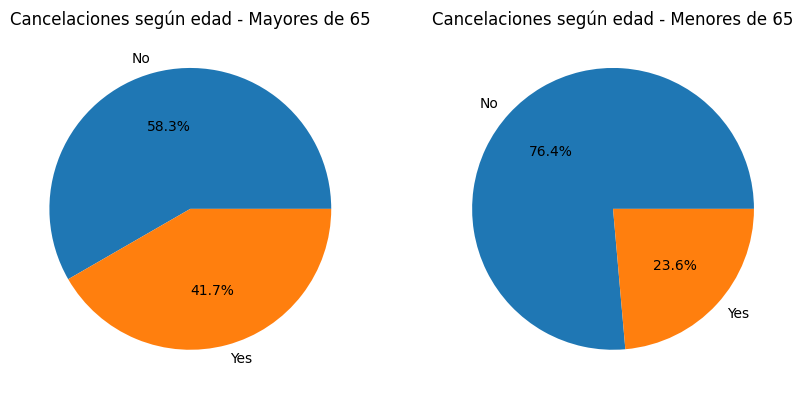

In [ ]:
# Create a df that stores the churn count

churn_count = df.groupby("SeniorCitizen")["Churn"].value_counts().reset_index()

churn_yes = churn_count.copy()[(churn_count["SeniorCitizen"] == 1)]
churn_no  = churn_count.copy()[(churn_count["SeniorCitizen"] == 0)]

churn_yes.drop(columns=["SeniorCitizen"], inplace=True)
churn_yes.columns = ["Churn", "Count"]

churn_no.drop(columns=["SeniorCitizen"], inplace=True)
churn_no.columns = ["Churn", "Count"]

# Create the plots for men and women

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pie(churn_yes["Count"], labels = churn_yes['Churn'], autopct="%1.1f%%")
ax[0].set_title("Cancelaciones según edad - Mayores de 65")

ax[1].pie(churn_no["Count"], labels = churn_no['Churn'], autopct="%1.1f%%")
ax[1].set_title("Cancelaciones según edad - Menores de 65")

# Use a graphic to show the ratio of customers who churned vs who didn't
fig.show()

In [ ]:
fig = px.histogram(df, x="HasPartner", color="Churn", barmode="group", title="Cantidad de personas que evaden según si tiene pareja")

fig.show()

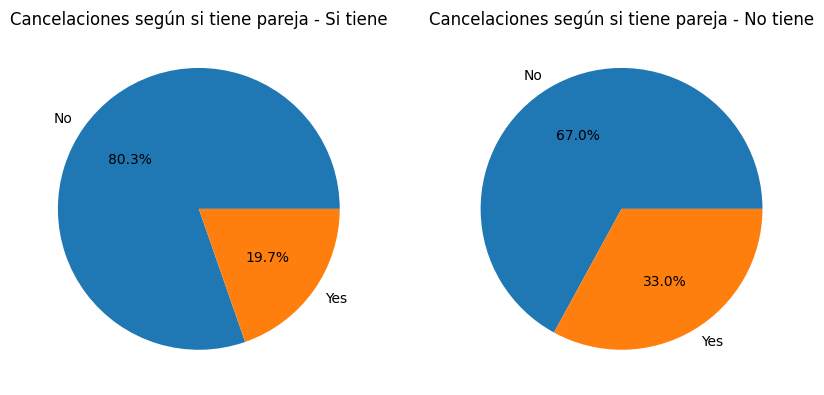

In [ ]:
# Create a df that stores the churn count

churn_count = df.groupby("HasPartner")["Churn"].value_counts().reset_index()

churn_yes = churn_count.copy()[(churn_count["HasPartner"] == "Yes")]
churn_no  = churn_count.copy()[(churn_count["HasPartner"] == "No")]

churn_yes.drop(columns=["HasPartner"], inplace=True)
churn_yes.columns = ["Churn", "Count"]

churn_no.drop(columns=["HasPartner"], inplace=True)
churn_no.columns = ["Churn", "Count"]

# Create the plots for men and women

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pie(churn_yes["Count"], labels = churn_yes['Churn'], autopct="%1.1f%%")
ax[0].set_title("Cancelaciones según si tiene pareja - Si tiene")

ax[1].pie(churn_no["Count"], labels = churn_no['Churn'], autopct="%1.1f%%")
ax[1].set_title("Cancelaciones según si tiene pareja - No tiene")

# Use a graphic to show the ratio of customers who churned vs who didn't
fig.show()

In [ ]:
fig = px.histogram(df, x="HasDependents", color="Churn", barmode="group", title="Cantidad de personas que evaden según si tienen dependientes")

fig.show()

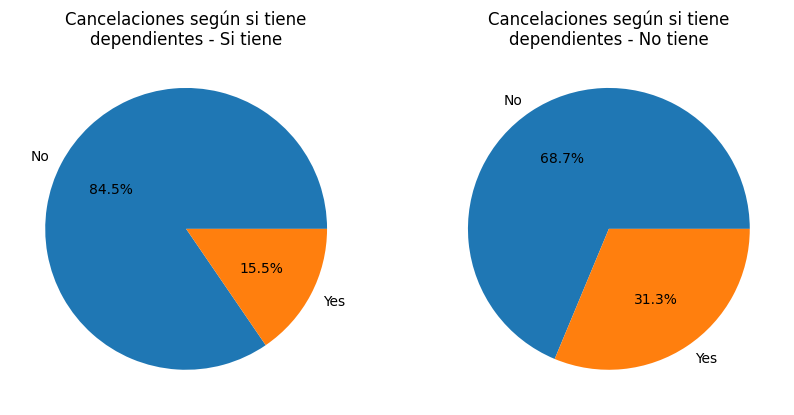

In [ ]:
# Create a df that stores the churn count

churn_count = df.groupby("HasDependents")["Churn"].value_counts().reset_index()

churn_yes = churn_count.copy()[(churn_count["HasDependents"] == "Yes")]
churn_no  = churn_count.copy()[(churn_count["HasDependents"] == "No")]

churn_yes.drop(columns=["HasDependents"], inplace=True)
churn_yes.columns = ["Churn", "Count"]

churn_no.drop(columns=["HasDependents"], inplace=True)
churn_no.columns = ["Churn", "Count"]

# Create the plots for men and women

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pie(churn_yes["Count"], labels = churn_yes['Churn'], autopct="%1.1f%%")
ax[0].set_title("Cancelaciones según si tiene\ndependientes - Si tiene")

ax[1].pie(churn_no["Count"], labels = churn_no['Churn'], autopct="%1.1f%%")
ax[1].set_title("Cancelaciones según si tiene\ndependientes - No tiene")

# Use a graphic to show the ratio of customers who churned vs who didn't
fig.show()

In [ ]:
fig = px.histogram(df, x="PhoneService", color="Churn", barmode="group", title="Cantidad de personas que evaden según si tienen servicio de teléfono")

fig.show()

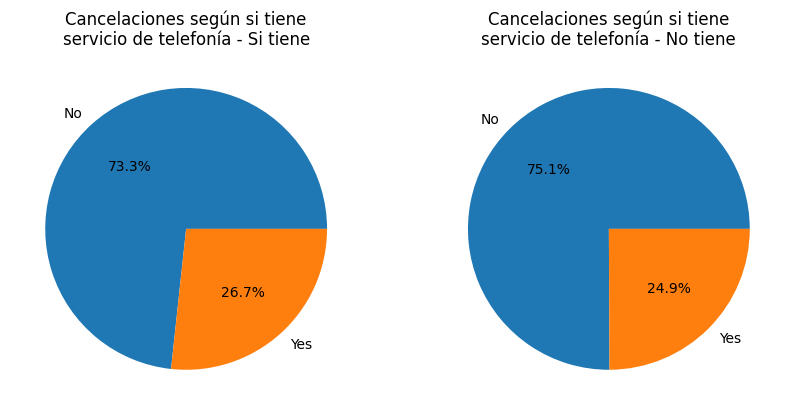

In [ ]:
# Create a df that stores the churn count

churn_count = df.groupby("PhoneService")["Churn"].value_counts().reset_index()

churn_yes = churn_count.copy()[(churn_count["PhoneService"] == "Yes")]
churn_no  = churn_count.copy()[(churn_count["PhoneService"] == "No")]

churn_yes.drop(columns=["PhoneService"], inplace=True)
churn_yes.columns = ["Churn", "Count"]

churn_no.drop(columns=["PhoneService"], inplace=True)
churn_no.columns = ["Churn", "Count"]

# Create the plots for men and women

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pie(churn_yes["Count"], labels = churn_yes['Churn'], autopct="%1.1f%%")
ax[0].set_title("Cancelaciones según si tiene\nservicio de telefonía - Si tiene")

ax[1].pie(churn_no["Count"], labels = churn_no['Churn'], autopct="%1.1f%%")
ax[1].set_title("Cancelaciones según si tiene\nservicio de telefonía - No tiene")

# Use a graphic to show the ratio of customers who churned vs who didn't
fig.show()

In [ ]:
fig = px.histogram(df, x="InternetService", color="Churn", barmode="group", title="Cantidad de personas que evaden según si tienen servicio de internet")

fig.show()

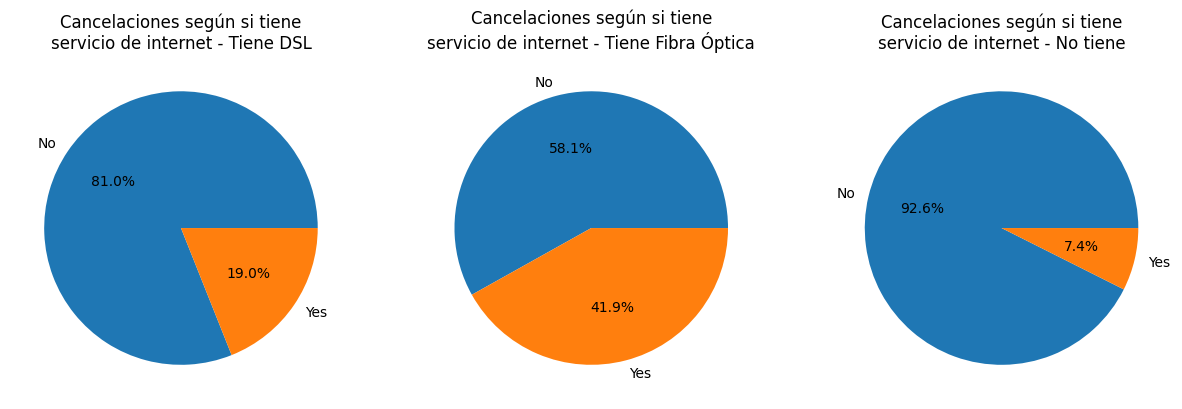

In [ ]:
# Create a df that stores the churn count

churn_count = df.groupby("InternetService")["Churn"].value_counts().reset_index()

churn_dsl = churn_count.copy()[(churn_count["InternetService"] == "DSL")]
churn_fiber_optic  = churn_count.copy()[(churn_count["InternetService"] == "Fiber optic")]
churn_no  = churn_count.copy()[(churn_count["InternetService"] == "No")]

churn_dsl.drop(columns=["InternetService"], inplace=True)
churn_dsl.columns = ["Churn", "Count"]

churn_fiber_optic.drop(columns=["InternetService"], inplace=True)
churn_fiber_optic.columns = ["Churn", "Count"]

churn_no.drop(columns=["InternetService"], inplace=True)
churn_no.columns = ["Churn", "Count"]

# Create the plots for men and women

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].pie(churn_dsl["Count"], labels = churn_dsl['Churn'], autopct="%1.1f%%")
ax[0].set_title("Cancelaciones según si tiene\nservicio de internet - Tiene DSL")

ax[1].pie(churn_fiber_optic["Count"], labels = churn_fiber_optic['Churn'], autopct="%1.1f%%")
ax[1].set_title("Cancelaciones según si tiene\nservicio de internet - Tiene Fibra Óptica")

ax[2].pie(churn_no["Count"], labels = churn_no['Churn'], autopct="%1.1f%%")
ax[2].set_title("Cancelaciones según si tiene\nservicio de internet - No tiene")

# Use a graphic to show the ratio of customers who churned vs who didn't
fig.show()

In [ ]:
fig = px.histogram(df, x="Contract", color="Churn", barmode="group", title="Cantidad de personas que evaden según su tipo de contrato")

fig.show()

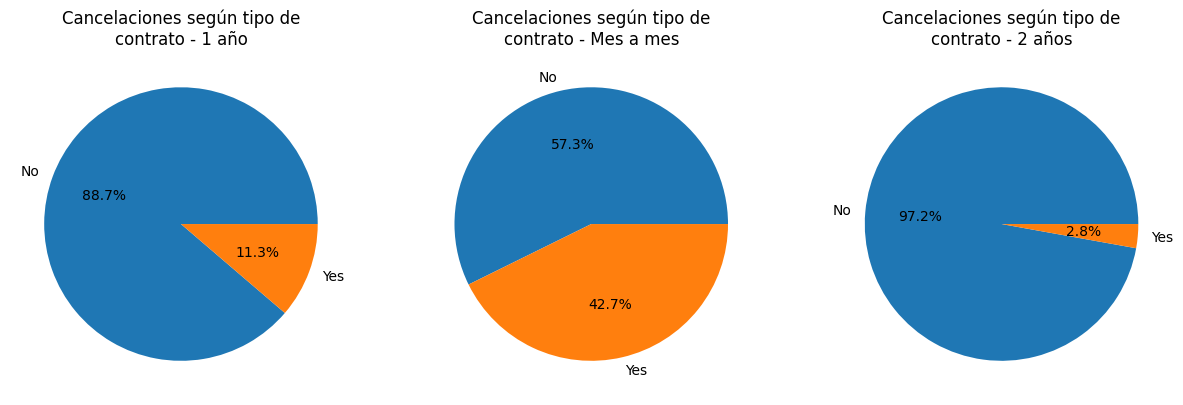

In [ ]:
# Create a df that stores the churn count

churn_count = df.groupby("Contract")["Churn"].value_counts().reset_index()

churn_one_year = churn_count.copy()[(churn_count["Contract"] == "One year")]
churn_month_to_month  = churn_count.copy()[(churn_count["Contract"] == "Month-to-month")]
churn_two_year  = churn_count.copy()[(churn_count["Contract"] == "Two year")]

churn_one_year.drop(columns=["Contract"], inplace=True)
churn_one_year.columns = ["Churn", "Count"]

churn_month_to_month.drop(columns=["Contract"], inplace=True)
churn_month_to_month.columns = ["Churn", "Count"]

churn_two_year.drop(columns=["Contract"], inplace=True)
churn_two_year.columns = ["Churn", "Count"]

# Create the plots for men and women

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].pie(churn_one_year["Count"], labels = churn_one_year['Churn'], autopct="%1.1f%%")
ax[0].set_title("Cancelaciones según tipo de\ncontrato - 1 año")

ax[1].pie(churn_month_to_month["Count"], labels = churn_month_to_month['Churn'], autopct="%1.1f%%")
ax[1].set_title("Cancelaciones según tipo de\ncontrato - Mes a mes")

ax[2].pie(churn_two_year["Count"], labels = churn_two_year['Churn'], autopct="%1.1f%%")
ax[2].set_title("Cancelaciones según tipo de\ncontrato - 2 años")

# Use a graphic to show the ratio of customers who churned vs who didn't
fig.show()

In [ ]:
fig = px.histogram(df, x="Tenure", color="Churn", barmode="group", title="Cantidad de personas que evaden según la cantidad de meses teniendo el servicio")

fig.show()

In [93]:
df_grouped = df.groupby(["Tenure", "Churn"]).size().unstack(fill_value=0)

df_grouped ['churn_rate'] = (df_grouped.get ('Yes', 8) / df_grouped. sum(axis=1)) * 100

df_grouped

Churn,No,Yes,churn_rate
Tenure,,,
0,11,0,0.000000
1,233,380,61.990212
2,115,123,51.680672
3,106,94,47.000000
4,93,83,47.159091
...,...,...,...
68,91,9,9.000000
69,87,8,8.421053
70,108,11,9.243697


In [97]:
fig = px.line(df_grouped.reset_index(), x="Tenure", y="churn_rate", markers=True, title="Tasa de cancelaciones por tiempo de contrato")

fig.show()

In [ ]:
fig = px.histogram(df, x="MonthlyCharges", color="Churn", barmode="group", title="Cantidad de personas que evaden según el costo mensual del servicio")

fig.show()

##📄Informe final

# Análisis de Cancelaciones - Telecom X

## Introducción

Telecom X es una empresa que ofrece servicios de Internet y Telefonía, y como es bien sabido, sus ingresos se ven directamente relacionados con la cantidad de clientes que tengan y los servicios que estos mismos contraten.

La empresa ha identificado que hay un índice muy alto de cancelaciones, afectando sus ganancias, y quieren identificar cuáles son aquellos factores que podrían tener más relación con que los clientes decidan dejar de contratar los servicios.

Para cumplir con los objetivos de este análisis, se utilizó Python y las bibliotecas Pandas, Matplotlib y Plotly.

## Limpieza y Tratamiento de Datos

Para iniciar con el análisis, primero se realizó la obtención y tratamiento de los datos. Los pasos a seguir fueron los siguientes:

- Se identificó el archivo con la información, la cual estaba almacenada en formato JSON.
- Se importó el archivo JSON y se convirtió en un dataframe con Pandas.
- Se hizo revisión de duplicados, valores nulos y valores vacíos
- Se suprimieron los valores vacíos, los cuales constituían un porcentaje muy pequeño de la información (3%). Adicionalmente estos hacían parte de la columna `Churn` y estimarlos podría haber afectado el análisis final.
- Se renombraron las columnas para que fuese más fácil poder presentarlas a los stakeholders y procesarlas en los siguientes pasos.

## Análisis Exploratorio de Datos

Durante el análisis realizado, se identificó que el porcentaje de cancelaciones que se ha tenido es de `26.5%`. A continuación, se la correlación que se identificó entre algunos de los datos que se estudiaron y la cantidad de cancelaciones:

## Conclusiones e Insights

A continuación, se presentan los principales hallazgos referentes a las cancelaciones de clientes

### Datos Categóricos

- Género: No se evidenció una diferencia significativa entre las cancelaciones realizadas por hombres y mujeres, la cual constituyó entre un `26%` y un `27%`.
- Edad: Se evidenció que las personas mayores de 65 años tienen una tasa de cancelación mucho más alta `(41.7%)` en comparación con las personas menores de 65 años `(23.6%)`.
- Pareja: Se evidenció que las personas sin pareja tienden a presentar más cancelaciones `(33.0%)` en comparación con las personas que tienen pareja `(19.7%)`.
- Dependientes: Se evidenció que las personas sin dependientes tienden a presentar más cancelaciones `(31.3%)` en comparación con las personas que si tienen dependientes `(15.5%)`.
- Servicio de teléfono: No se evidenció una diferencia significativa entre las personas que contratan el servicio telefónico y las que no, estando ubicadas entre un `24.9%` y un `26.7%`
- Servicio de internet: Se evidenció una tasa superior de cancelaciones por parte de los clientes que contrataron el servicio de internet de fibra óptica `(41.9%)`, seguida por las personas que contratan DSL `(19.0%)` y por último las que no contratan servicio de internet `(7.4%)`.
- Tipo de contrato: Se evidenció que las personas con tipo de contrato mes-a-mes tienen una muy alta tasa de cancelaciones `(42.7%)`, seguida por las personas con tipo de contrato de un año `(11.3%)`, y por último las que tienen contrato de dos años `(2.8%)`

### Datos Numéricos

- Antiguedad: Se evidenció una diferencia significativa en el porcentaje de cancelaciones según la antiguedad, presentando el primer mes de contrato una tasa de cancelaciones de `62%`, valor que va disminuyendo a medida que avanza el tiempo hasta un `1.65%` en el mes 72, con pequeñas variaciones durante este eje.
- Costos mensuales: No se evidenció una diferencia significativa entre las tasas de cancelaciones en función del costo mensual de los servicios
- Costos totales: No se evidenció una diferencia significativa entre las tasas de cancelaciones en función del costo total que ha asumido el cliente a lo largo del tiempo

## Recomendaciones adicionales

Con base en los datos recopilados anteriormente y los análisis realizados, se recomiendan los siguientes planes de acción para mejorar las tasas de retención de clientes:

- Ofrecer alternativas o paquetes preferenciales a adultos mayores
- Hacer revisiones en el servicio de internet, se debe validar la calidad del servicio de fibra óptica dado que es el que más cancelaciones presenta. También se deberían identificar posibles mejoras en el servicio de DSL.
- Revisar los tipos de contrato que se ofrecen, posiblemente suprimiendo el tipo de contrato mes-a-mes, dado que es el que genera menos retención de clientes, presentando un porcentaje de cancelaciones del 42.7%
- Ofrecer incentivos o facilidades de pago a clientes nuevos, intentando lograr que conserven el producto por más de 3 meses donde la tasa de retención ya comienza a incrementar respecto a al tasa de cancelaciones